In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import os.path
import sys
os.chdir("E:\\2_Studium\\1_Mannheim\\4_Semester\\Masterarbeit\\code\\master-thesis-code\\results")

In [2]:
def errorfill(x, y, yerr, color=None, alpha_fill=0.1, ax=None, linestyle=None):
    ax = ax if ax is not None else plt.gca()
    if color is None:
        color = ax._get_lines.color_cycle.next()
    if np.isscalar(yerr) or len(yerr) == len(y):
        ymin = y - yerr
        ymax = y + yerr
        ind_min = np.where(ymin<0)
        ind_max = np.where(ymax>1)
        ymax[ind_max] = 1.0
        ymin[ind_min] = 0.0
    elif len(yerr) == 2:
        ymin, ymax = yerr
    ax.plot(x, y, color=color, linestyle=linestyle)
    ax.fill_between(x, ymax, ymin, color=color, alpha=alpha_fill)

In [3]:
scenario = 'deepmatcher_2source/new_val'
tasks = ['dbpedia_dnb','abt_buy','amazon_google','wdc_phones','wdc_headphones','cameras','watches']
#tasks = ['wdc_headphones']

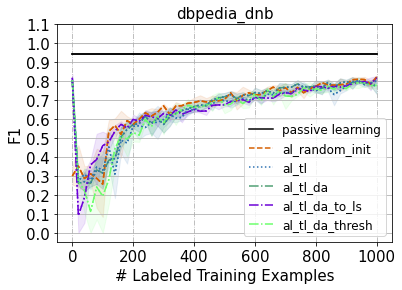

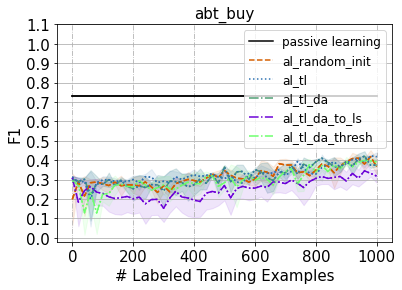

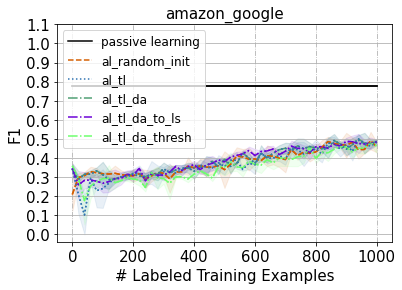

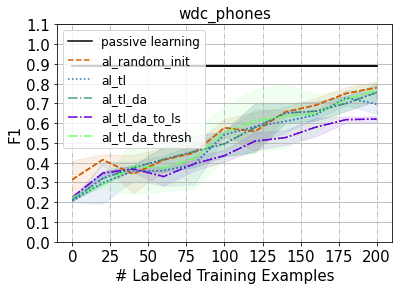

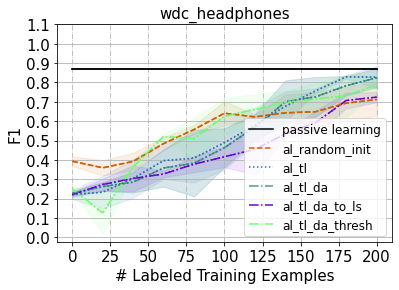

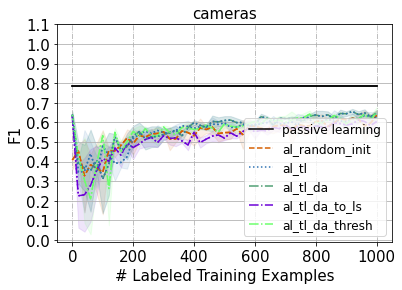

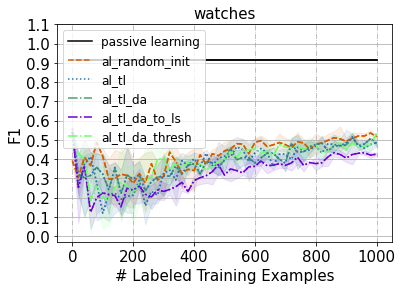

In [6]:
for task in tasks:

    if task == 'dbpedia_viaf':
        passive_learning = [0.952]
        ylim = (0.7,1)
    if task == 'dbpedia_dnb':
        passive_learning = [0.944]
        ylim = (0.7,1)
    if task == 'abt_buy':
        passive_learning = [0.731]
        ylim = (0.3,1)
    if task == 'amazon_google':
        passive_learning = [0.778]
        ylim = (0.3,1)
    if task == 'wdc_phones':
        passive_learning = [0.889]
        ylim = (0.3,1)
    if task == 'wdc_headphones':
        passive_learning = [0.871]
        ylim = (0.3,1)
    if task == 'cameras':
        passive_learning = [0.784]
        ylim = (0,1)
    if task == 'watches':
        passive_learning = [0.915]
        ylim = (0,1)

    al_random_init = pd.read_csv(os.path.join(scenario,task,'al_random_init_'+task+'.csv'))
    al_tl = pd.read_csv(os.path.join(scenario,task,'al_tl_'+task+'.csv'))
    al_tl_da = pd.read_csv(os.path.join(scenario,task,'al_tl_da_'+task+'.csv'))
    al_tl_da_to_ls = pd.read_csv(os.path.join(scenario,task,'al_tl_da_to_ls_'+task+'.csv'))
    al_tl_da_thresh = pd.read_csv(os.path.join(scenario,task,'al_tl_da_thresh_'+task+'.csv'))

    query_num = np.arange(0,1020,20)
    if task in ['wdc_phones','wdc_headphones']:
        query_num = np.arange(0,220,20)

    #query_num = np.arange(0,len(al_random_init['F1 Mean']))

    passive_learning = passive_learning*len(al_random_init['F1 Mean'])

    fig, ax = plt.subplots()

    pas_, =  ax.plot(query_num, passive_learning, color="#000000", label="passive learning")
    alrandominit_, = ax.plot(query_num, al_random_init['F1 Mean'], color="#D55E00", label="al_random_init", linestyle ='--')
    altl_, = ax.plot(query_num, al_tl['F1 Mean'], color="#2F73B2", label="al_tl" , linestyle = 'dotted')
    altlda_, = ax.plot(query_num, al_tl_da['F1 Mean'], color="#4E9E73", label="al_tl_da", linestyle='dashdot')
    altldatols_, = ax.plot(query_num, al_tl_da_to_ls['F1 Mean'], color="#6B00D7", label="al_tl_da_to_ls", linestyle='dashdot')
    altldathresh_, = ax.plot(query_num, al_tl_da_thresh['F1 Mean'], color="#6CFF6C", label="al_tl_da_thresh", linestyle='dashdot')

    ax.plot(query_num,passive_learning, color="#000000")

    #ax.plot(al_random_init['F1 Mean'], color="#D55E00", linestyle='--')
    errorfill(query_num, al_random_init['F1 Mean'].to_numpy(), al_random_init['F1 Std'].to_numpy(), color="#D55E00", linestyle ='--')

    #ax.plot(al_tl['F1 Mean'], color="#2F73B2" , linestyle = 'dotted')
    errorfill(query_num, al_tl['F1 Mean'].to_numpy(), al_tl['F1 Std'].to_numpy(), color="#2F73B2", linestyle = 'dotted')

    #ax.plot(al_tl_da['F1 Mean'], color="#2F73B2" , linestyle = 'dotted')
    errorfill(query_num, al_tl_da['F1 Mean'].to_numpy(), al_tl_da['F1 Std'].to_numpy(), color="#4E9E73", linestyle = 'dotted')

    #ax.plot(al_tl_da['F1 Mean'], color="#2F73B2" , linestyle = 'dotted')
    errorfill(query_num, al_tl_da['F1 Mean'].to_numpy(), al_tl_da['F1 Std'].to_numpy(), color="#2F73B2", linestyle = 'dotted')

    #ax.plot(al_tl_da_to_ls['F1 Mean'], color="#6B00D7" , linestyle = 'dotted')
    errorfill(query_num, al_tl_da_to_ls['F1 Mean'].to_numpy(), al_tl_da_to_ls['F1 Std'].to_numpy(), color="#6B00D7", linestyle = 'dotted')

    #ax.plot(al_tl_da_thresh['F1 Mean'], color="#6CFF6C" , linestyle = 'dotted')
    errorfill(query_num, al_tl_da_thresh['F1 Mean'].to_numpy(), al_tl_da_thresh['F1 Std'].to_numpy(), color="#6CFF6C", linestyle = 'dotted')

    plt.yticks(np.arange(0, 1.2, step=0.1))
    #plt.ylim(ylim)

    ax.grid(True)
    gridlines = ax.get_xgridlines()
    for line in gridlines:
        line.set_linestyle('-.')
    ax.set_xlabel("# Labeled Training Examples", fontsize=15)
    ax.set_ylabel("F1", fontsize=15)

    ax.legend(handles=[pas_, alrandominit_, altl_, altlda_, altldatols_, altldathresh_], fontsize=12)

    plt.title(task, fontsize=15)

    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    plt.savefig('%s.pdf' % (os.path.join(scenario,'graphs',task)), bbox_inches='tight', format='pdf')

In [8]:
np.arange(0,1040,20)

array([   0,   20,   40,   60,   80,  100,  120,  140,  160,  180,  200,
        220,  240,  260,  280,  300,  320,  340,  360,  380,  400,  420,
        440,  460,  480,  500,  520,  540,  560,  580,  600,  620,  640,
        660,  680,  700,  720,  740,  760,  780,  800,  820,  840,  860,
        880,  900,  920,  940,  960,  980, 1000, 1020])